In [13]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC

In [ ]:
onlyfiles = [f for f in listdir("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/CSVfiles") if isfile(join("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/CSVfiles", f))]
onlyfiles = [datafile for datafile in onlyfiles if datafile.startswith ('HIP') and datafile.endswith('.csv')]
#print onlyfiles
countfiles=0
## insert 'get headers' here
for datafile in onlyfiles[0:6]:
    print datafile
    countfiles=countfiles+1
    global sample_name
    sample_name=re.sub('.csv', '', datafile)
    print sample_name
    print countfiles

# # uncomment until here, and ident the following:

    global create_pdf, figlist
    # sample_name='HIP00110' ## use instead of reading the file names from the directory
    figlist=[]
    create_pdf=False
    print 'generating dataframes'
    
    ##if need to generate dfs:
    sample_df, sample_df_prod, sample_df_non_prod = get_sample_data(sample_name)## generate dataframe from
                                                                                ## the sample TSV file, and also
                                                                                ## sub-dfs for productive and non
                                                                                ## productive sequences alone.

In [52]:
sample_name='HIP13939'
sample_df= pickle.load( open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_%s' %sample_name,"rb" ))
sample_df_prod= pickle.load( open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_prod_%s' %sample_name,"rb" ))
sample_df_non_prod= pickle.load( open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_non_prod_%s' %sample_name,"rb" ))

In [40]:
df_combined_prod=sample_df_prod[['vGeneName','jGeneName','count (reads)']]
df_combined_prod=df_combined_prod.replace('unresolved', np.nan)


#if not 'unresolved' in df_combined_prod['vGeneName'] and not 'unresolved' in df_combined_prod['jGeneName']:
df_combined_prod['v-j']=df_combined_prod['vGeneName']+'_'+df_combined_prod['jGeneName']
print df_combined_prod[0:5]
    
        


/usr/wisdom/python/lib/python2.7/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


    vGeneName   jGeneName  count (reads)                    v-j
0  TCRBV06-01  TCRBJ02-01          11687  TCRBV06-01_TCRBJ02-01
2  TCRBV25-01  TCRBJ02-07          11041  TCRBV25-01_TCRBJ02-07
4         NaN  TCRBJ02-06           9573                    NaN
5  TCRBV06-04  TCRBJ02-01           7175  TCRBV06-04_TCRBJ02-01
6         NaN  TCRBJ02-06           6410                    NaN


In [41]:
df_combined_non_prod=sample_df_non_prod[['vGeneName','jGeneName','count (reads)']]
df_combined_non_prod=df_combined_non_prod.replace('unresolved', np.nan)


#if not 'unresolved' in df_combined_prod['vGeneName'] and not 'unresolved' in df_combined_prod['jGeneName']:
df_combined_non_prod['v-j']=df_combined_non_prod['vGeneName']+'_'+df_combined_non_prod['jGeneName']
print df_combined_non_prod[0:5]

     vGeneName   jGeneName  count (reads)                    v-j
1   TCRBV27-01  TCRBJ02-07          11457  TCRBV27-01_TCRBJ02-07
3   TCRBV06-01  TCRBJ01-05           9778  TCRBV06-01_TCRBJ01-05
21  TCRBV23-01  TCRBJ02-02           3171  TCRBV23-01_TCRBJ02-02
24  TCRBV06-05  TCRBJ01-01           3090  TCRBV06-05_TCRBJ01-01
36  TCRBV23-01  TCRBJ01-02           2310  TCRBV23-01_TCRBJ01-02


In [42]:
sum_var_prod = df_combined_prod.groupby(['v-j'])[['count (reads)']].sum()
sum_var_non_prod = df_combined_non_prod.groupby(['v-j'])[['count (reads)']].sum()
print sum_var_prod[0:10]



                       count (reads)
v-j                                 
TCRBV01-01_TCRBJ01-01             41
TCRBV01-01_TCRBJ01-02             52
TCRBV01-01_TCRBJ01-03             80
TCRBV01-01_TCRBJ01-04             56
TCRBV01-01_TCRBJ01-05             70
TCRBV01-01_TCRBJ02-01             84
TCRBV01-01_TCRBJ02-02             64
TCRBV01-01_TCRBJ02-03             90
TCRBV01-01_TCRBJ02-04              4
TCRBV01-01_TCRBJ02-05             80


In [ ]:
sum_var_prod['weighted reads']=sum_var_prod['count (reads)']/(sum_var_prod['count (reads)'].sum())
sum_var_non_prod['weighted reads']=sum_var_non_prod['count (reads)']/(sum_var_non_prod['count (reads)'].sum())

In [53]:
def plot_var_bar(ax,var, count, sample_df_prod, sample_df_non_prod, sample_name):        
        print '%s' % var
        print count
        print ax
#         sample_df_prod['count (reads)'].sum())*100)
        sum_var_prod = sample_df_prod.groupby(['%s' % var])[['count (reads)']].sum()
        sum_var_non_prod = sample_df_non_prod.groupby(['%s' % var])[['count (reads)']].sum()
        sum_var_prod['weighted reads']=sum_var_prod['count (reads)']/(sum_var_prod['count (reads)'].sum())
        sum_var_non_prod['weighted reads']=sum_var_non_prod['count (reads)']/(sum_var_non_prod['count (reads)'].sum())
        
        varlist_prod=sum_var_prod.index.tolist()
        varlist_non_prod=sum_var_non_prod.index.tolist()
        print type(varlist_prod[0])
        if isinstance(varlist_prod[0], str):
            print 'string'
            varlist_total=list(set(varlist_prod+varlist_non_prod))
        else:
            print 'not string'
            max_varlist=max(varlist_prod+varlist_non_prod)
            print max_varlist
            varlist_total=range(max_varlist+1)

        weighted_reads_prod=[]
        weighted_reads_non_prod=[]
        for i in varlist_total:
            if i in varlist_prod and i in varlist_non_prod:
                weighted_reads_prod.append(sum_var_prod.loc[i,'weighted reads'])
                weighted_reads_non_prod.append(sum_var_non_prod.loc[i,'weighted reads'])
            elif i in varlist_prod and i not in varlist_non_prod:
                weighted_reads_prod.append(sum_var_prod.loc[i,'weighted reads'])
                weighted_reads_non_prod.append(0.0)
            elif i not in varlist_prod and i in varlist_non_prod:
                weighted_reads_prod.append(0.0)
                weighted_reads_non_prod.append(sum_var_non_prod.loc[i,'weighted reads'])
            else:
                weighted_reads_prod.append(0.0)
                weighted_reads_non_prod.append(0.0)
                
        print('total weighted reads in prod=%s' %sum(weighted_reads_prod))
        print('total weighted reads in non prod=%s' %sum(weighted_reads_non_prod))
        print weighted_reads_prod[0:10]
        print weighted_reads_non_prod[0:10]
                
        if not isinstance(varlist_prod[0], str):
            ks_s,ks_p=stats.ks_2samp(sample_df_prod[var], sample_df_non_prod[var])
            print('KS_p_value=%s' %ks_p)
            t_s,t_p=stats.ttest_ind(sample_df_prod[var], sample_df_non_prod[var])
            print('ttest_p_value=%s' %t_p)
            if ks_p<=10**-6:
                text_ks='KS_p_value<10^-6'
            else:
                text_ks='KS_p_value=%s' %round(ks_p,6)
            if t_p<=10**-6:
                text_t='ttest_p_value<10^-6'
            else:
                text_t='ttest_p_value=%s' %round(t_p,6)
            ax.annotate(text_ks+'\n'+text_t, xy=(0.95, 0.95), xycoords='axes fraction', fontsize=8,
                horizontalalignment='right', verticalalignment='top', fontweight='bold')
            
           
        space = 0.3
        width = (1 - space) / 2
        if isinstance(varlist_prod[0], str):
            pos_prod = [i - 0.5 * width for i in range(len(varlist_total))]
            pos_non_prod = [i + 0.5 * width for i in range(len(varlist_total))]
            print varlist_total
            print len(varlist_total)
            xtickspos=range(len(varlist_total))
            xtickslab=varlist_total
            rot=90
            
        else:
            pos_prod = [i - 0.5 * width for i in varlist_total]
            pos_non_prod = [i + 0.5 * width for i in varlist_total]
            xtickspos=[i for i in range(len(varlist_total)) if i%3==0]
            xtickslab=xtickspos
            rot=0
           
        print 'showing bar graph'
        bar1=ax.bar(pos_prod,weighted_reads_prod, align='center', label='Productive', width=width, color='black', edgecolor='None')
        bar2=ax.bar(pos_non_prod, weighted_reads_non_prod, align='center', label='Non-Productive', width=width, color='red', edgecolor='None')
        ax.set_xticks(xtickspos)
        #ax.set_yticks(yticks)
        ax.set_xticklabels(xtickslab, rotation=rot, fontsize=7)
        #ax.set_yticklabels(yticks, fontsize=8)
        ax.set_title('%s (bps)' % var, fontsize=9)
        ax.set_ylabel("Frequency (%)", fontsize=8)
        print 'now set yscale'
        ax.set_yscale('log')
        if not isinstance(varlist_prod[0], str):
            ax.set_xlim(-1.5*width,max_varlist+1)
        ax.margins(0.05)
        
        if count==0:
            ax.legend(loc='upper left', fontsize=8) 
        return bar1,bar2


In [54]:
def length_par_hist (sample_df_prod, sample_df_non_prod, sample_name):
    print 'working on length parameters histograms...'
    sample_df_prod=sample_df_prod.replace('unresolved', np.nan)
    sample_df_non_prod=sample_df_non_prod.replace('unresolved', np.nan)
    sample_df_prod['v-j']=sample_df_prod['vGeneName']+'_'+sample_df_prod['jGeneName']
    sample_df_non_prod['v-j']=sample_df_non_prod['vGeneName']+'_'+sample_df_non_prod['jGeneName']
    
    
    
    
    var_list = ['cdr3Length', 'vDeletion', 'n1Insertion', 'd5Deletion', 'd3Deletion', 'n2Insertion', 'jDeletion','vGeneName','vFamilyName', 'jGeneName', 'jFamilyName','dGeneName','v-j']
    
    fig2=plt.figure(figsize=(8, 10))    
    ax1 = plt.subplot2grid((7,1), (0,0)) 
    ax2 = plt.subplot2grid((7,1), (1,0))
    ax3 = plt.subplot2grid((7,1), (2,0))
    ax4 = plt.subplot2grid((7,1), (3,0))
    ax5 = plt.subplot2grid((7,1), (4,0))
    ax6 = plt.subplot2grid((7,1), (5,0))
    ax7 = plt.subplot2grid((7,1), (6,0))
    print 'start working on length parameters...'
    
#     ((ax1), (ax2),(ax3), (ax4),(ax5),(ax6),(ax7)) = plt.subplots(7, 1, sharey=False, figsize=(8,10))
    ax_list1=[ax1,ax2,ax3,ax4,ax5,ax6,ax7]
    plt.suptitle('CDR3 Length Parameters - Sample %s' % sample_name, fontsize=12, fontweight='bold')
    
    count=0
    for var in var_list[0:7]:
        plot_var_bar(ax_list1[count],var, count, sample_df_prod, sample_df_non_prod, sample_name)
        count=count+1
    plt.subplots_adjust(left=0.12,bottom=0.04, right=0.97, top=0.90, wspace=0.28,hspace=0.60)
    print 'finished working on length parameters'
    plt.show()
  
    print 'start working on Gene Usage Distributions...'
    fig3=plt.figure(figsize=(8, 10))    
    ax1 = plt.subplot2grid((5,1), (0,0)) 
    ax2 = plt.subplot2grid((5,1), (1,0))
    ax3 = plt.subplot2grid((5,1), (2,0))
    ax4 = plt.subplot2grid((6,1), (3,0))
    ax5 = plt.subplot2grid((6,1), (4,0))
    ax_list1=[ax1,ax2,ax3,ax4,ax5,ax6,ax7]
    plt.suptitle('Gene Usage Distributions - Sample %s' % sample_name, fontsize=12, fontweight='bold')
    
    count=0
    for var in var_list[7:12]:
        print ax_list1[count]
        plot_var_bar(ax_list1[count],var, count, sample_df_prod, sample_df_non_prod, sample_name)
        count=count+1
    plt.subplots_adjust(left=0.12,bottom=0.04, right=0.97, top=0.90, wspace=0.28,hspace=0.99)
    plt.show()
    
    fig4=plt.figure(figsize=(11, 4))
    ax1 = plt.subplot2grid((1,1), (0,0))
    ax_list1=[ax1,ax2,ax3,ax4,ax5,ax6,ax7]
    plt.suptitle('Gene Usage Combination Distributions - Sample %s' % sample_name, fontsize=12, fontweight='bold')
    
    count=0
    for var in var_list[12:13]:
        print ax_list1[count]
        plot_var_bar(ax_list1[count],var, count, sample_df_prod, sample_df_non_prod, sample_name)
        count=count+1
    plt.subplots_adjust(left=0.12,bottom=0.04, right=0.97, top=0.90, wspace=0.28,hspace=0.99)
    plt.show()
    
    
    
    
    
    print 'finished working on Gene Usage Distributions...'
    plt.show()
    return fig2, fig3, fig4

working on length parameters histograms...
start working on length parameters...
cdr3Length
0
Axes(0.125,0.805488;0.775x0.0945122)
<type 'numpy.int64'>
not string
81
total weighted reads in prod=1.0
total weighted reads in non prod=1.0
[0.0, 0.0, 0.0, 1.1799860699539216e-05, 0.0, 0.0, 1.5836655149381579e-05, 0.0, 0.0, 5.8999303497696081e-06]
[0.0, 0.0, 7.6761714433187529e-05, 0.0, 5.0292157732088383e-05, 3.0439990206264021e-05, 0.0, 0.0, 0.00015617038453648497, 0.0]
KS_p_value=0.0
ttest_p_value=0.0
showing bar graph
now set yscale
vDeletion
1
Axes(0.125,0.692073;0.775x0.0945122)
<type 'numpy.int64'>
not string
78
total weighted reads in prod=1.0
total weighted reads in non prod=1.0
[0.13124022435882507, 0.088761346885783868, 0.12005581955156182, 0.12819834447954384, 0.13747458760263162, 0.1413722679052794, 0.12312564646934195, 0.058554014017613468, 0.03445000383495473, 0.011077274493017432]
[0.10494782188635296, 0.087844517823937748, 0.11420819629823249, 0.11121184247966807, 0.14068039

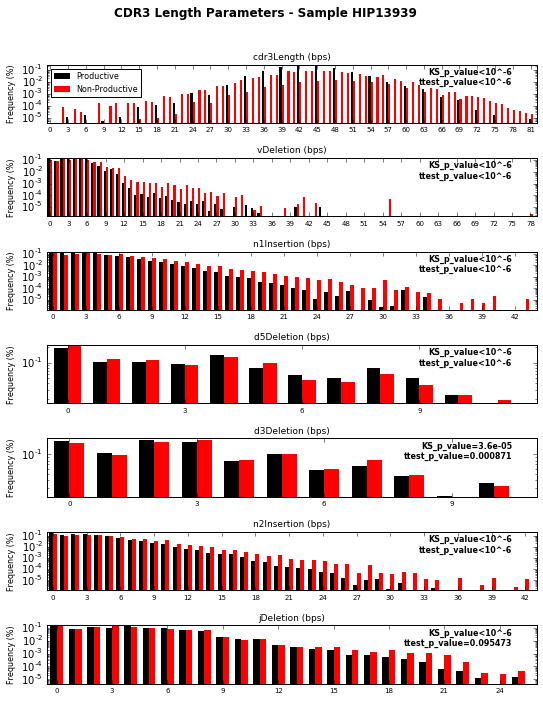

start working on Gene Usage Distributions...
Axes(0.125,0.766379;0.775x0.133621)
vGeneName
0
Axes(0.125,0.766379;0.775x0.133621)
<type 'str'>
string
total weighted reads in prod=1.0
total weighted reads in non prod=1.0
[0.0063153355763772272, 0.018695592834127497, 0.02047420400622672, 0.0083677009591287335, 0.00030975368055019851, 0.068558023431303322, 0.00021045843940320001, 6.3691369819389478e-05, 0.043362350488465332, 0.045890620951295882]
[0.0030195121951219514, 0.01211869918699187, 0.018009756097560975, 0.089330081300813005, 0.0034910569105691056, 0.039256910569105692, 0.00072845528455284551, 1.9512195121951219e-05, 0.041682926829268295, 0.03481951219512195]
['TCRBV04-02', 'TCRBV04-03', 'TCRBV04-01', 'TCRBV21-01', 'TCRBV06-09', 'TCRBV06-01', 'TCRBVA-or09_02', 'TCRBV22-01', 'TCRBV06-04', 'TCRBV06-05', 'TCRBV06-06', 'TCRBV06-07', 'TCRBV09-01', 'TCRBV14-01', 'TCRBV28-01', 'TCRBV10-01', 'TCRBV06-08', 'TCRBV20-01', 'TCRBV23-01', 'TCRBV10-03', 'TCRBV11-02', 'TCRBV11-03', 'TCRBV29-01', '

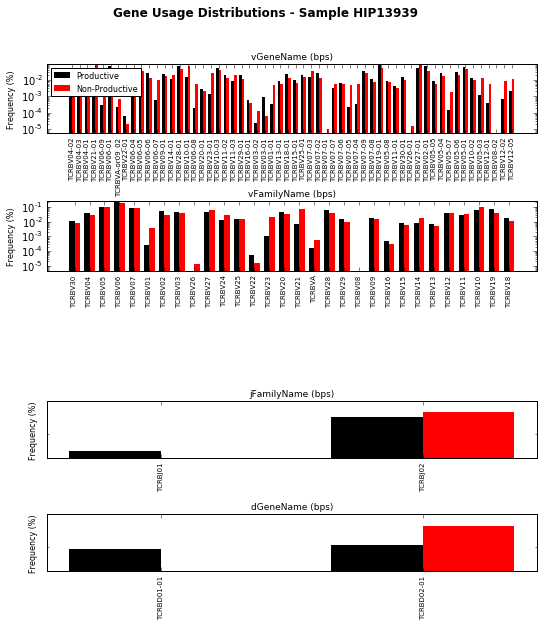

Axes(0.125,0.125;0.775x0.775)
v-j
0
Axes(0.125,0.125;0.775x0.775)
<type 'str'>
string
total weighted reads in prod=1.0
total weighted reads in non prod=1.0
[0.0026880603505756201, 0.0019401678049274643, 9.4970481987067402e-06, 7.8350647639330599e-05, 0.00085869144129973435, 0.0016117282213888562, 0.0037370884661911022, 0.0012999084721979849, 0.0033651207450750881, 0.001581258525084672]
[0.015461015526100836, 0.0015376404622358757, 0.0002082729938266583, 7.8102372684996855e-05, 0.001135738669460996, 0.00073220974392184551, 0.00061505618489435027, 0.0014123512393870265, 0.0027579900354389518, 0.0015099792052432725]
['TCRBV10-01_TCRBJ02-07', 'TCRBV30-01_TCRBJ02-07', 'TCRBV12-01_TCRBJ02-05', 'TCRBV09-01_TCRBJ01-06', 'TCRBV09-01_TCRBJ01-05', 'TCRBV09-01_TCRBJ01-04', 'TCRBV09-01_TCRBJ01-03', 'TCRBV09-01_TCRBJ01-02', 'TCRBV09-01_TCRBJ01-01', 'TCRBV10-03_TCRBJ02-05', 'TCRBV05-01_TCRBJ02-06', 'TCRBV05-01_TCRBJ02-07', 'TCRBV05-01_TCRBJ02-04', 'TCRBV05-01_TCRBJ02-05', 'TCRBV05-01_TCRBJ02-02', 'TC

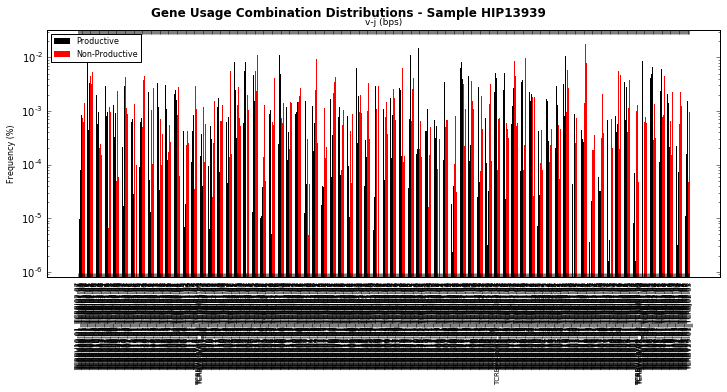

finished working on Gene Usage Distributions...


(<matplotlib.figure.Figure at 0x7fd9325c3310>,
 <matplotlib.figure.Figure at 0x7fd9391e2550>)

In [55]:
length_par_hist(sample_df_prod, sample_df_non_prod, sample_name)

In [56]:
seq_prod=list(sample_df_prod['nucleotide'])
from Bio.SeqUtils import GC

gc_values = sorted(GC(seq) for seq in seq_prod)

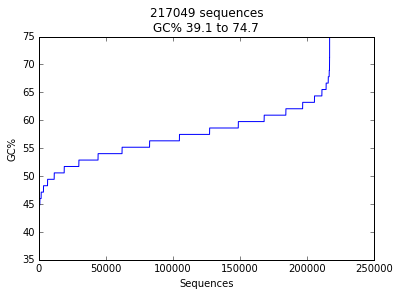

In [57]:
plt.plot(gc_values)
plt.title("%i sequences\nGC%% %0.1f to %0.1f" \
            % (len(gc_values),min(gc_values),max(gc_values)))
plt.xlabel("Sequences")
plt.ylabel("GC%")
plt.show()

In [58]:
print sample_name

HIP13939


In [59]:
seq_prod=list(sample_df_prod['nucleotide'])
gc_values_prod = sorted(GC(seqp) for seqp in seq_prod)
seq_non_prod=list(sample_df_non_prod['nucleotide'])
gc_values_non_prod = sorted(GC(seqn) for seqn in seq_non_prod)

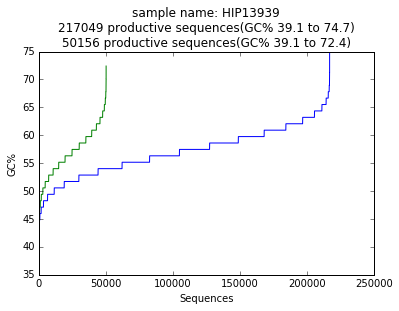

In [60]:
plt.plot(gc_values_prod)
plt.plot(gc_values_non_prod)
plt.title("sample name: %s\n%i productive sequences(GC%% %0.1f to %0.1f)\n%i productive sequences(GC%% %0.1f to %0.1f)" \
            % (sample_name, len(gc_values_prod),min(gc_values_prod),max(gc_values_prod),len(gc_values_non_prod),min(gc_values_non_prod),max(gc_values_non_prod)))
plt.xlabel("Sequences")
plt.ylabel("GC%")
plt.show()

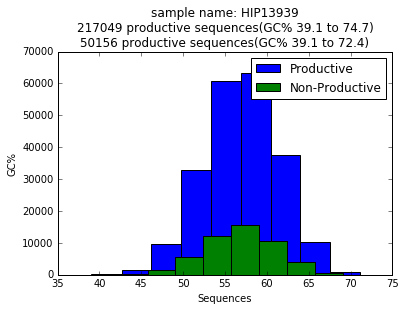

In [61]:
plt.hist(gc_values_prod, label='Productive')
plt.hist(gc_values_non_prod, label='Non-Productive')
plt.title("sample name: %s\n%i productive sequences(GC%% %0.1f to %0.1f)\n%i productive sequences(GC%% %0.1f to %0.1f)" \
            % (sample_name, len(gc_values_prod),min(gc_values_prod),max(gc_values_prod),len(gc_values_non_prod),min(gc_values_non_prod),max(gc_values_non_prod)))
plt.xlabel("Sequences")
plt.ylabel("GC%")
plt.legend()
plt.show()

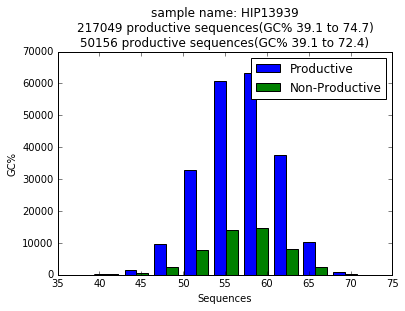

In [63]:
plt.hist([gc_values_prod,gc_values_non_prod], label=['Productive','Non-Productive'])
plt.title("sample name: %s\n%i productive sequences(GC%% %0.1f to %0.1f)\n%i productive sequences(GC%% %0.1f to %0.1f)" \
            % (sample_name, len(gc_values_prod),min(gc_values_prod),max(gc_values_prod),len(gc_values_non_prod),min(gc_values_non_prod),max(gc_values_non_prod)))
plt.xlabel("Sequences")
plt.ylabel("GC%")
plt.legend()
plt.show()

In [69]:
weights_prod=(np.ones_like(seq_prod, dtype=np.float))/len(seq_prod)
weights_non_prod=(np.ones_like(seq_non_prod, dtype=np.float))/len(seq_non_prod)


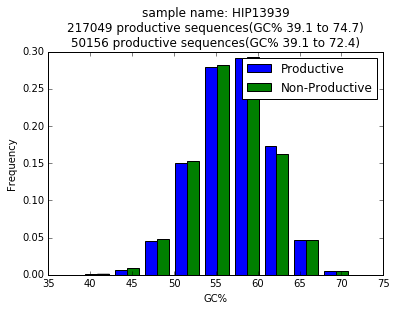

In [70]:
plt.hist([gc_values_prod,gc_values_non_prod], weights=[weights_prod, weights_non_prod], label=['Productive','Non-Productive'])
plt.title("sample name: %s\n%i unique productive sequences(GC%% %0.1f to %0.1f)\n%i unique productive sequences(GC%% %0.1f to %0.1f)" \
            % (sample_name, len(gc_values_prod),min(gc_values_prod),max(gc_values_prod),len(gc_values_non_prod),min(gc_values_non_prod),max(gc_values_non_prod)))
plt.xlabel("GC%")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [106]:
print aa_non_prod[:100]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'CASSLGTGR*GLNQPQHF', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'CASMRDAK*NTEAFF', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'CAISED*REFCDTQYF', nan, nan, 'CASPKPN*SGTGAEKLFF', 'CASSNSDKE*GDSYEQYF', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'CASSYSFGA*GGNTIYF', nan, nan, nan, nan, nan, nan, nan, 'CASKRS*ADNSPLHF', nan, nan, nan, nan, nan, nan, 'CASPGQGR*PQHF', nan, nan, nan, nan, nan, nan]


In [72]:
sample_name='HIP01162'
sample_df= pickle.load( open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_%s' %sample_name,"rb" ))
sample_df_prod= pickle.load( open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_prod_%s' %sample_name,"rb" ))
sample_df_non_prod= pickle.load( open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_non_prod_%s' %sample_name,"rb" ))

In [73]:
seq_prod=list(sample_df_prod['nucleotide'])
gc_values_prod = sorted(GC(seqp) for seqp in seq_prod)
seq_non_prod=list(sample_df_non_prod['nucleotide'])
gc_values_non_prod = sorted(GC(seqn) for seqn in seq_non_prod)

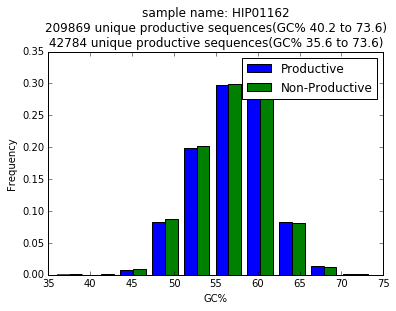

In [74]:
weights_prod=(np.ones_like(seq_prod, dtype=np.float))/len(seq_prod)
weights_non_prod=(np.ones_like(seq_non_prod, dtype=np.float))/len(seq_non_prod)
plt.hist([gc_values_prod,gc_values_non_prod], weights=[weights_prod, weights_non_prod], label=['Productive','Non-Productive'])
plt.title("sample name: %s\n%i unique productive sequences(GC%% %0.1f to %0.1f)\n%i unique productive sequences(GC%% %0.1f to %0.1f)" \
            % (sample_name, len(gc_values_prod),min(gc_values_prod),max(gc_values_prod),len(gc_values_non_prod),min(gc_values_non_prod),max(gc_values_non_prod)))
plt.xlabel("GC%")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [105]:
aa_prod=list(sample_df_prod['aminoAcid'])
aa_non_prod=list(sample_df_non_prod['aminoAcid'])


In [80]:
aa_list=["A", "R", "N", "D", "C", "E", "Q", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]
aa_prod_count=[0]*len(aa_list)
for aap in aa_prod:
    aa_ind=0
    for aa in aa_list:
        aa_prod_count[aa_ind]+=aap.count(aa)
        aa_ind+=1
print aa_prod_count


[290400, 111852, 85012, 71153, 191280, 147091, 169115, 285474, 34286, 33783, 119117, 26066, 8202, 283774, 86877, 424484, 180349, 21143, 159600, 53559]


In [119]:
aa_list=["A", "R", "N", "D", "C", "E", "Q", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]
aa_non_prod_count=[0]*len(aa_list)
for aap in aa_non_prod:
    if isinstance(aap, basestring):
        aa_ind=0
        for aa in aa_list:
            aa_non_prod_count[aa_ind]+=aap.count(aa)
            aa_ind+=1
print aa_non_prod_count


[4959, 3216, 1602, 1767, 3610, 3097, 3469, 4531, 762, 675, 1931, 759, 127, 5110, 1870, 7474, 3036, 383, 3243, 943]


In [123]:
total_aa_prod=sum(aa_prod_count)
norm_aa_prod_count=[float(i)/total_aa_prod for i in aa_prod_count]
total_aa_non_prod=sum(aa_non_prod_count)
norm_aa_non_prod_count=[float(i)/total_aa_non_prod for i in aa_non_prod_count]
print norm_aa_prod_count
print norm_aa_non_prod_count


[0.10436218854409357, 0.04019669253799571, 0.030551096324071908, 0.025570533062940392, 0.06874104485094427, 0.052860670368936866, 0.060775521748052286, 0.1025919125772609, 0.012321494478039917, 0.01214072939251072, 0.04280754412123551, 0.00936744079404388, 0.002947584953301155, 0.10198097690052206, 0.031221328698847164, 0.1525484822381233, 0.06481272844951354, 0.0075982429489936994, 0.057356078827952246, 0.019247708182620893]
[0.09434213530172741, 0.06118255840499201, 0.030477132638307588, 0.03361616315348908, 0.06867818278669811, 0.058918651548588385, 0.0659957385282703, 0.08619968038962027, 0.014496613651929077, 0.012841488471197017, 0.036736169241305835, 0.014439540369834868, 0.002416102275321513, 0.0972148238338026, 0.03557567917205692, 0.14218857012403927, 0.05775816147933947, 0.007286355680694011, 0.06169621794383989, 0.017940035004946352]


In [121]:
print total_aa_prod

2782617


In [125]:
space = 0.3
width = (1 - space) / 2
pos_prod = [i - 0.5 * width for i in range(len(aa_list))]
pos_non_prod = [i + 0.5 * width for i in range(len(aa_list))]
xtickspos=range(len(aa_list))
xtickslab=aa_list


In [129]:
fig1=plt.figure(figsize=(10,8))
ax = plt.subplot2grid((1,1), (0,0), colspan=1) 

bar1=ax.bar(pos_prod,norm_aa_prod_count, align='center', label='Productive', width=width, color='black', edgecolor='None')
bar2=ax.bar(pos_non_prod, norm_aa_non_prod_count, align='center', label='Non-Productive', width=width, color='red', edgecolor='None')
ax.set_xticks(xtickspos)
ax.set_xticklabels(xtickslab, fontsize=8)
ax.set_title('AminoAcid', fontsize=9)
ax.set_ylabel("Frequency (%)", fontsize=8)
#ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=8) 
#return bar1,bar2
plt.show()

AttributeError: 'Figure' object has no attribute 'bar'

In [130]:
import cv2

ImportError: No module named cv2

In [134]:
help("modules")


Please wait a moment while I gather a list of all available modules...



/usr/wisdom/python/lib/python2.7/site-packages/Bio/PopGen/Async/__init__.py:17: BiopythonDeprecationWarning: Bio.PopGen.Async has been deprecated, and we intend to remove it in a future release of Biopython. If you would like to continue using it, please contact the Biopython developers via the mailing list.
  " via the mailing list.", BiopythonDeprecationWarning)
/usr/wisdom/python/lib/python2.7/site-packages/Bio/PopGen/FDist/__init__.py:28: BiopythonDeprecationWarning: Bio.PopGen.FDist has been deprecated, and we intend to remove it in a future release of Biopython. If you would like to continue using it, please contact the Biopython developers via the mailing list.
  " via the mailing list.", BiopythonDeprecationWarning)
/usr/wisdom/python/lib/python2.7/site-packages/Bio/PopGen/SimCoal/__init__.py:17: BiopythonDeprecationWarning: Bio.PopGen.SimCoal has been deprecated, and we intend to  remove it in a future release of Biopython. If you would like to continue using it, please contac

Generating grammar tables from /usr/wisdom/python/lib/python2.7/site-packages/sphinx/pycode/Grammar-py2.txt
Writing grammar tables to /usr/wisdom/python/lib/python2.7/site-packages/sphinx/pycode/Grammar-py2-sphinx1.2.pickle
Writing failed:[Errno 30] Read-only file system: '/usr/wisdom/python/lib/python2.7/site-packages/sphinx/pycode/Grammar-py2-sphinx1.2.pickle'
ANSI                bz2                 jupyter_core        runpy
BaseHTTPServer      bz2file             keyword             sched
Bastion             cPickle             lasagne             scipy
Bio                 cProfile            leap                screen
BioSQL              cStringIO           lib2to3             select
CDROM               cachecontrol        libfuturize         sets
CGIHTTPServer       calendar            libpasteurize       setuptools
Canvas              certifi             limix               sgmllib
ConfigParser        cffi                linecache           sha
Cookie              cgi            

/usr/wisdom/python/lib/python2.7/pkgutil.py:110: ImportWarning: Not importing directory '/usr/wisdom/python/lib/python2.7/site-packages/tests': missing __init__.py
  __import__(name)
